# (샘플) Creating multiple subplots using plt.subplots

- toc:true
- branch: master
- badges: true
- comments: true
- author: 신록예찬
- hide: false
- categories: [파이썬]


ref: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html


--- 

`.pyplot.subplots` creates a figure and a grid of subplots with a single call,
while providing reasonable control over how the individual plots are created.
For more advanced use cases you can use `.GridSpec` for a more general subplot
layout or `.Figure.add_subplot` for adding subplots at arbitrary locations
within the figure.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

### A figure with just one subplot

``subplots()`` without arguments returns a `.Figure` and a single
`~.axes.Axes`.

This is actually the simplest and recommended way of creating a single
Figure and Axes.



Text(0.5, 1.0, 'A single plot')

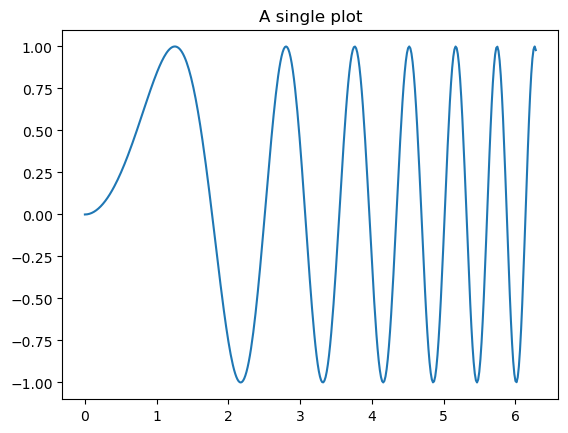

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

### Stacking subplots in one direction

The first two optional arguments of `.pyplot.subplots` define the number of
rows and columns of the subplot grid.

When stacking in one direction only, the returned ``axs`` is a 1D numpy array
containing the list of created Axes.



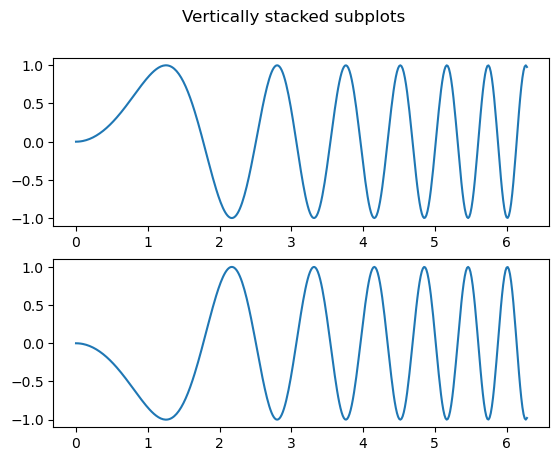

In [5]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

If you are creating just a few Axes, it's handy to unpack them immediately to
dedicated variables for each Axes. That way, we can use ``ax1`` instead of
the more verbose ``axs[0]``.



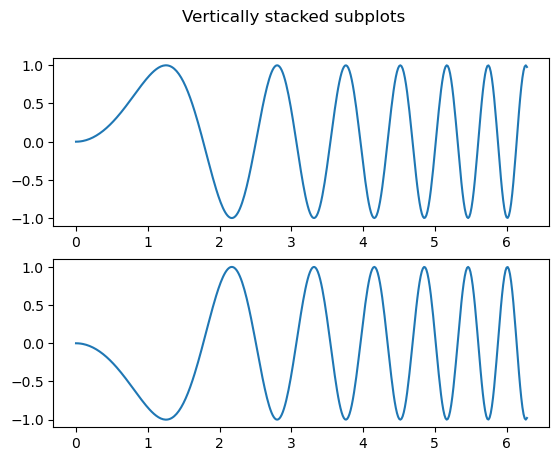

In [7]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

To obtain side-by-side subplots, pass parameters ``1, 2`` for one row and two
columns.



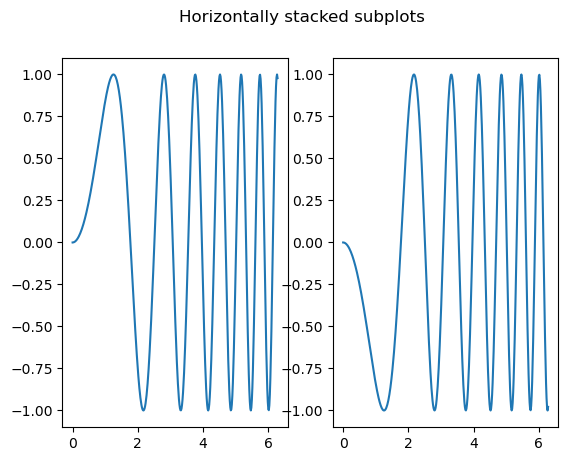

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

### Stacking subplots in two directions

When stacking in two directions, the returned ``axs`` is a 2D NumPy array.

If you have to set parameters for each subplot it's handy to iterate over
all subplots in a 2D grid using ``for ax in axs.flat:``.



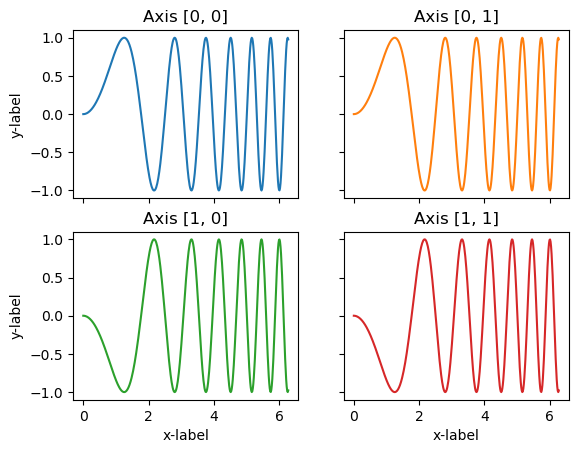

In [11]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

You can use tuple-unpacking also in 2D to assign all subplots to dedicated
variables:



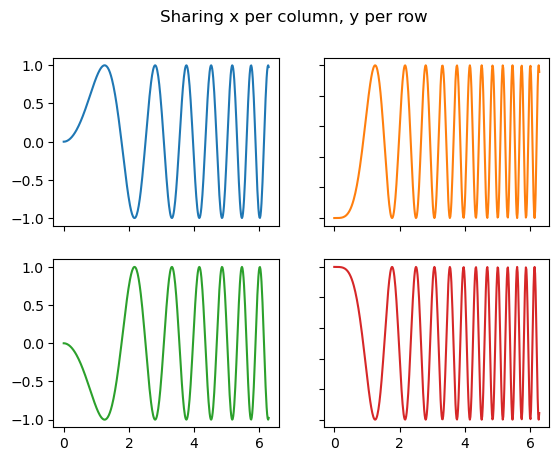

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

### Sharing axes

By default, each Axes is scaled individually. Thus, if the ranges are
different the tick values of the subplots do not align.



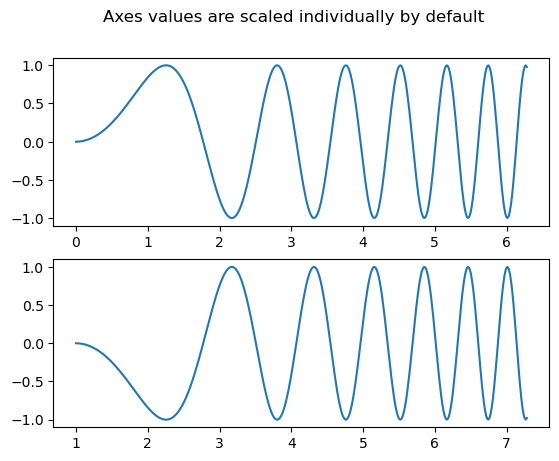

In [15]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Axes values are scaled individually by default')
ax1.plot(x, y)
ax2.plot(x + 1, -y)

You can use *sharex* or *sharey* to align the horizontal or vertical axis.



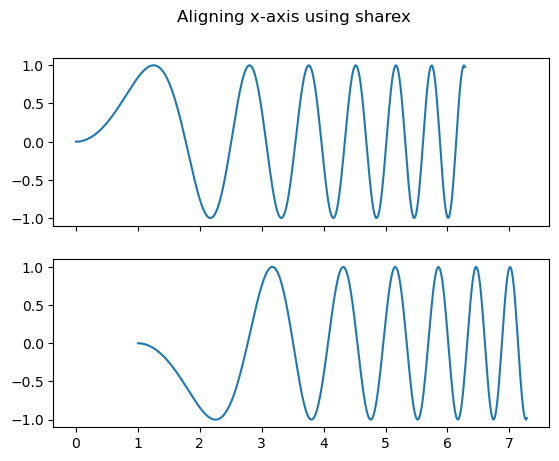

In [17]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Aligning x-axis using sharex')
ax1.plot(x, y)
ax2.plot(x + 1, -y)

Setting *sharex* or *sharey* to ``True`` enables global sharing across the
whole grid, i.e. also the y-axes of vertically stacked subplots have the
same scale when using ``sharey=True``.



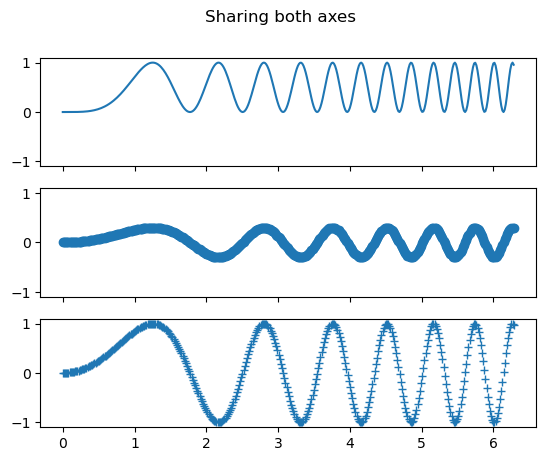

In [19]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

For subplots that are sharing axes one set of tick labels is enough. Tick
labels of inner Axes are automatically removed by *sharex* and *sharey*.
Still there remains an unused empty space between the subplots.

To precisely control the positioning of the subplots, one can explicitly
create a `.GridSpec` with `.Figure.add_gridspec`, and then call its
`~.GridSpecBase.subplots` method.  For example, we can reduce the height
between vertical subplots using ``add_gridspec(hspace=0)``.

`.label_outer` is a handy method to remove labels and ticks from subplots
that are not at the edge of the grid.



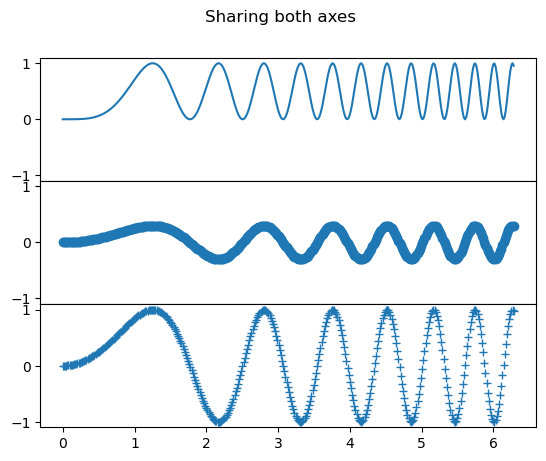

In [21]:
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

Apart from ``True`` and ``False``, both *sharex* and *sharey* accept the
values 'row' and 'col' to share the values only per row or column.



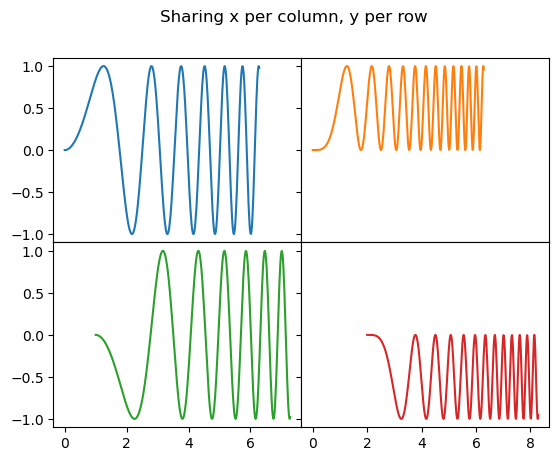

In [23]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x + 1, -y, 'tab:green')
ax4.plot(x + 2, -y**2, 'tab:red')

for ax in axs.flat:
    ax.label_outer()

If you want a more complex sharing structure, you can first create the
grid of axes with no sharing, and then call `.axes.Axes.sharex` or
`.axes.Axes.sharey` to add sharing info a posteriori.



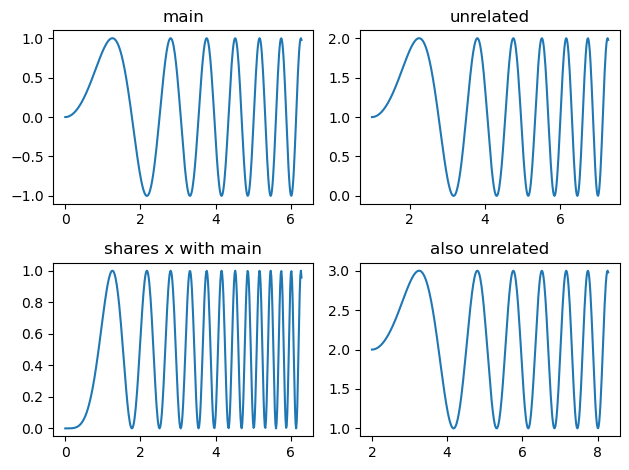

In [25]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")
axs[1, 0].plot(x, y**2)
axs[1, 0].set_title("shares x with main")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(x + 1, y + 1)
axs[0, 1].set_title("unrelated")
axs[1, 1].plot(x + 2, y + 2)
axs[1, 1].set_title("also unrelated")
fig.tight_layout()

### Polar axes

The parameter *subplot_kw* of `.pyplot.subplots` controls the subplot
properties (see also `.Figure.add_subplot`). In particular, this can be used
to create a grid of polar Axes.



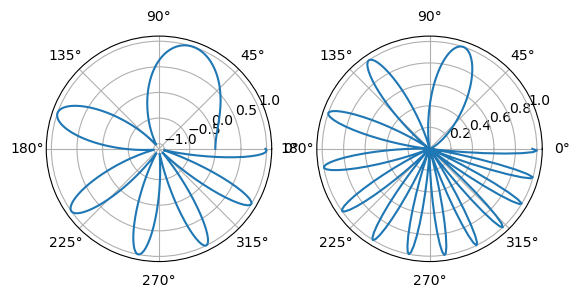

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax1.plot(x, y)
ax2.plot(x, y ** 2)

plt.show()